# Laguage detection task

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### In this task objects will be words either in English or in French, and you will have to implement K-NN classifier predicting the language of each word by its Levenstein (edit) distance to the words in the training set.

* Download python wheel Python-Levenstein from <http://www.lfd.uci.edu/~gohlke/pythonlibs/#python-levenshtein>
* Install it with pip intall [wheel-name].
* Levenstein distance can now be computed as Levenshtein.distance(source, target)

In [2]:
import Levenshtein  

In [24]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
import pandas as pd
import tqdm

In [4]:
with open('Data/en.txt') as f:
    english = f.readlines()
    
with open('Data/fr.txt') as f:
    french = f.readlines()

In [5]:
len(english), len(french)

(164144, 191448)

In [6]:
random.seed(0)

In [7]:
english[:4]

['twist\n', 'author\n', 'charles\n', 'dickens\n']

In [8]:
french[:4]

['des\n', 'mati\n', 'res\n', 'chapitre\n']

In [9]:
random.seed(0)

In [10]:
random.shuffle(english)

In [11]:
random.shuffle(french)

#### Forming train and test sets for your task.

In [12]:
N1 = 15000
N2 = 500
X_train = english[:N1]+french[:N1]
Y_train = [1]*N1 + [2]*N1
X_test = english[N1:N1+N2]+french[N1:N1+N2]
Y_test = [1]*N2 + [2]*N2

In [13]:
inds = arange(len(X_train)) 
inds = random.permutation(inds)
X_train = [X_train[ind] for ind in inds]
Y_train = [Y_train[ind] for ind in inds]

inds = arange(len(X_test))
inds = random.permutation(inds)
X_test = [X_test[ind] for ind in inds]
Y_test = [Y_test[ind] for ind in inds]

#### Implement KNN class having constructor, fit(X,Y), predict_one(x) and predict(X) methods.

* constructor should have parameter K
* predict_one(x) predicts class for single object
* predict(X) predicts class for each row of X

You will need this class, because default implementation of K-NN 
requires objects to be numeric vectors and your objects are strings.

#### For K=[1,3,5,7,11,21] estimate accuracy of your KNN and plot the dependency between K and accuracy.

#### What value of K is optimal? Explain

In [14]:
class KNN:
    def __init__(self, k):
        self.neighbours = k
        self.dataset = None
    
    def fit(self, dataset, labels):
        if len(dataset) != len(labels):
            raise IndexError('dataset shape and labels shape should be equal')
        cleaned_dataset = self.__clean_data(dataset)
        self.dataset = pd.DataFrame([cleaned_dataset, labels]).T
        self.dataset.columns = ['word', 'label']
        
    def predict_one(self, x):
        cleaned_x = x.strip()
        self.dataset['Levenstein'] = self.dataset['word'].apply(lambda x: Levenshtein.distance(x, cleaned_x))
        self.dataset = self.dataset.sort_values('Levenstein')
        predicted_label = argmax(bincount(self.dataset['label'].head(self.neighbours)))
        self.dataset = self.dataset.drop(columns=['Levenstein'])
        return predicted_label
    
    def predict(self, X):
        cleaned_X = self.__clean_data(X)
        prediction = []
        for word in cleaned_X:
            prediction.append(self.predict_one(word))
        return prediction
        
    def __clean_data(self, data):
        cleaned_data = []
        for word in data:
            cleaned_data.append(word.strip())
        return cleaned_data

In [25]:
K=[1,3,5,7,11,21]
acc = []
recall = []
precision = []
for k in tqdm.tqdm_notebook(K):
    print(f'number of neighbours {k}')
    knn = KNN(k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    acc.append(accuracy_score(Y_test, Y_pred))
    recall.append(recall_score(Y_test, Y_pred))
    precision.append(precision_score(Y_test, Y_pred))

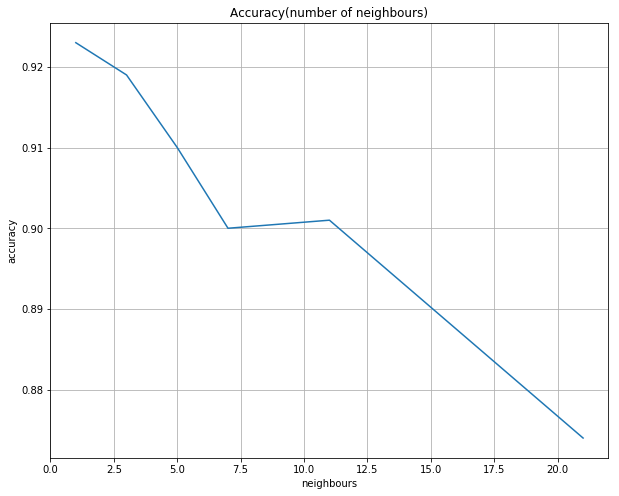

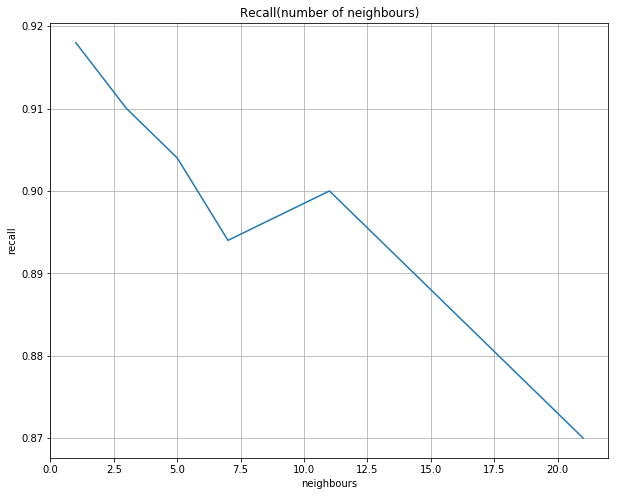

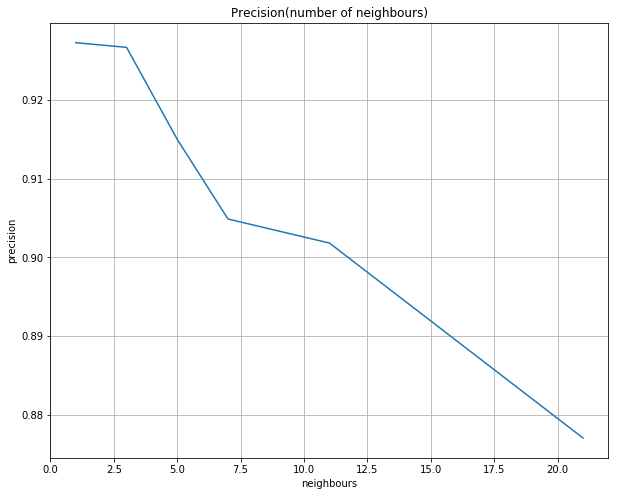

In [27]:
figure(figsize=(10,8))
plot(K, acc)
title('Accuracy(number of neighbours)')
xlabel('neighbours')
ylabel('accuracy')
grid()
show()

figure(figsize=(10,8))
plot(K, recall)
title('Recall(number of neighbours)')
xlabel('neighbours')
ylabel('recall')
grid()
show()

figure(figsize=(10,8))
plot(K, precision)
title('Precision(number of neighbours)')
xlabel('neighbours')
ylabel('precision')
grid()
show()

# Why is that?

По основным метрикам (Accuracy, Recall и Precision) было выяснено, что данная модель на предоставленном датасете наиболее хорошо работает при k=1. Это может быть связано с тем, что тренировочный датасет содержит достаточное количество слов для точного совпадения со словами из тестовой выборки. Тогда как при повышении k, редкие слова не имеют достаточно точных совпадений в тренировочной выборке и таким образом получается, что при голосовании выигрывает не ближайшее слово, а некоторое похожее и более употребимое слово из тренировочной выборки. Например, из примера ниже. Слово "qu" достаточно популярное и имеет точное совпадение с 21 ближайшим соседом из тренировочной выборки.

Получается, что при высоких k модель чаще предсказывает более популярные слова, а при малых k способна предсказывать редкие слова. При нынешней структуре данных следует использовать малые k.

In [52]:
X_test[-1]

'qu\n'

In [53]:
knn.dataset.head(knn.neighbours)

,word,label
14866,qu,2
24766,qu,2
25755,qu,2
6376,qu,2
6676,qu,2
28291,qu,2
15548,qu,2
4890,qu,2
23484,qu,2
20026,qu,2
